***An important note:***  This was the second half of an effort to use KMean and DBSCAN on a data set.  For this to make the most sense, please start with the ETL notebook and then this one then the DBSCAN.

In [1]:
# loading the needed modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Pulling in the csv
Games_df = pd.read_csv('./Data/with_ratingvotes.csv')

# Display the first few rows
print(Games_df.head())

                         name    year  rating    votes  Action  Adventure  \
0                  Spider-Man  2018.0     9.2  20759.0    True       True   
1      Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2          Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                  God of War  2018.0     9.6  26118.0    True       True   
4  Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   

   Comedy  Crime  Family  Fantasy  Mystery  Sci-Fi  Thriller  
0   False  False   False     True    False   False     False  
1   False   True   False    False    False   False     False  
2   False   True   False    False    False   False     False  
3   False  False   False    False    False   False     False  
4   False  False   False    False    False   False     False  


In [3]:
# Turning the datafram in features for the ML algorithm
features = Games_df.drop('name', axis=1)

Our understanding of KMeans is that numbers work better than boolean, so here, we convert the boolean to integers just before we put all the features through a standard scaler as part of the pre-processing step. 

In [4]:
# Convert boolean to intiger 
for column in features.columns:
    if features[column].dtype == bool:
        features[column] = features[column].astype(int)

print(features.dtypes)
features.head()

year         float64
rating       float64
votes        float64
Action         int32
Adventure      int32
Comedy         int32
Crime          int32
Family         int32
Fantasy        int32
Mystery        int32
Sci-Fi         int32
Thriller       int32
dtype: object


,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,2018.0,9.2,20759.0,1,1,0,0,0,1,0,0,0
1,2018.0,9.7,35703.0,1,1,0,1,0,0,0,0,0
2,2013.0,9.5,59986.0,1,0,0,1,0,0,0,0,0
3,2018.0,9.6,26118.0,1,1,0,0,0,0,0,0,0
4,2016.0,9.5,28722.0,1,1,0,0,0,0,0,0,0


In [5]:
# Normalize the data using Standard Scaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

The KMeans ML algorithm requires the user to set the number of clusters.  A good common technique is to use what is called the "elbow method."  The following few cells of code will go through different iterations of the elbow method, and most of the iterations were kept in this process to show the journey of finding where the bend in the elbow was.  We also, at this time, wanted to see if removing years as one of the features would affect the location of the elbow.  

In [6]:
# Since starting with a Kmeans (even though it might not be best for the dataset) and for that we use the "elbow methold" to find best number of clusters
inertia_values = []
num_clusters = list(range(1, 11))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [7]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia
elbow_data = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(10)

,num_clusters,inertia_values
0,1,128160.000000
1,2,116131.088216
2,3,104986.199843
3,4,94340.579972
4,5,84673.542051
5,6,75858.811948
6,7,69127.506751
7,8,62490.402966
8,9,55504.698543
9,10,49376.496170


We found it helpful to not only graph the inertia (below) but have a table of the values as well (above).

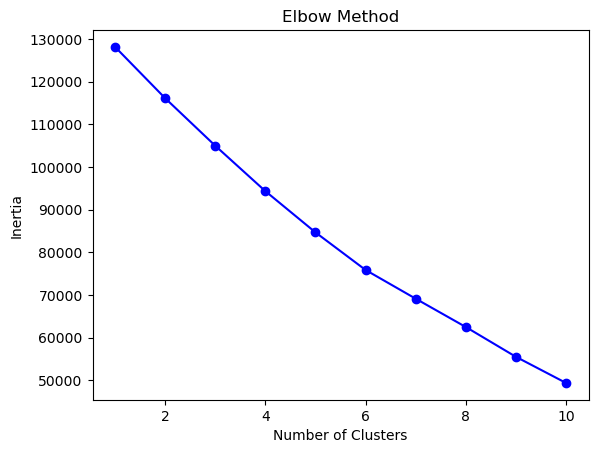

In [8]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [9]:
# Another run but this time with 20 clusters.
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [10]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia
elbow_data = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(20)

,num_clusters,inertia_values
0,1,128160.000000
1,2,116131.088216
2,3,104986.199843
3,4,94340.579972
4,5,84673.542051
5,6,75858.811948
6,7,69127.506751
7,8,62490.402966
8,9,55504.698543
9,10,49376.496170


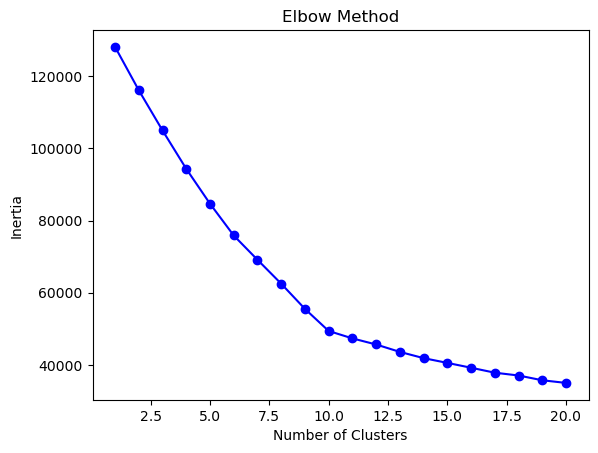

In [11]:
plt.plot(df_elbow['num_clusters'], df_elbow['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Running 20 clusters, we finally see a definable "elbow."

In [12]:
# Select another set of features year along with name this time
features_noyear = Games_df.drop(['name', 'year'], axis=1)

In [13]:
features_scaled_without_year = scaler.fit_transform(features_noyear)

In [14]:
inertia_values = []
num_clusters = list(range(1, 21))  
for num in num_clusters:
    kmeans_model = KMeans(n_clusters=num, random_state=1)
    kmeans_model.fit(features_scaled_without_year)
    inertia_values.append(kmeans_model.inertia_)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [15]:
# Define a DataFrame to hold the values for number of clusters and the corresponding inertia again
elbow_data2 = {"num_clusters": num_clusters, "inertia_values": inertia_values}
df_elbow2 = pd.DataFrame(elbow_data2)

# Review the DataFrame
df_elbow2.head(20)

,num_clusters,inertia_values
0,1,117480.000000
1,2,105541.255568
2,3,94183.966893
3,4,83716.349251
4,5,74495.067959
5,6,66468.774864
6,7,59627.458579
7,8,49515.750008
8,9,43356.473592
9,10,39292.494478


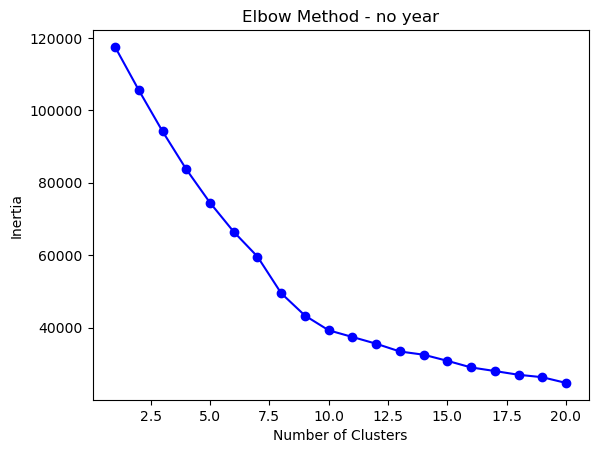

In [16]:
plt.plot(df_elbow2['num_clusters'], df_elbow2['inertia_values'], 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - no year')
plt.show()

Removing the year along with the name didn't significantly change the elbow, and we felt it was better to keep as many features as possible, so we removed the name only.

Below we create, fit, and run the features through the model to create the clusters. 
We then attach the clusters to the original data frame. 

In [17]:
# Initialize KMeans
kmeans_model = KMeans(n_clusters=10, random_state=1)

# Fit the model
kmeans_model.fit(features_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans_model.labels_

# Add these cluster assignments back to your DataFrame for further analysis
Games_df['Cluster'] = cluster_assignments

Games_df.head(10)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Cluster
0,Spider-Man,2018.0,9.2,20759.0,True,True,False,False,False,True,False,False,False,8
1,Red Dead Redemption II,2018.0,9.7,35703.0,True,True,False,True,False,False,False,False,False,8
2,Grand Theft Auto V,2013.0,9.5,59986.0,True,False,False,True,False,False,False,False,False,8
3,God of War,2018.0,9.6,26118.0,True,True,False,False,False,False,False,False,False,8
4,Uncharted 4: A Thief's End,2016.0,9.5,28722.0,True,True,False,False,False,False,False,False,False,8
5,The Last of Us: Part II,2020.0,8.5,30460.0,True,True,False,False,False,False,False,False,False,8
6,Horizon Forbidden West,2022.0,9.2,2979.0,True,True,False,False,False,False,True,False,False,3
7,The Last of Us,2013.0,9.7,60590.0,True,True,False,False,False,False,False,False,False,8
8,Detroit: Become Human,2018.0,9.2,16907.0,True,True,False,False,False,False,False,False,False,8
9,Death Stranding,2019.0,8.8,8136.0,True,True,False,False,False,False,False,False,False,0


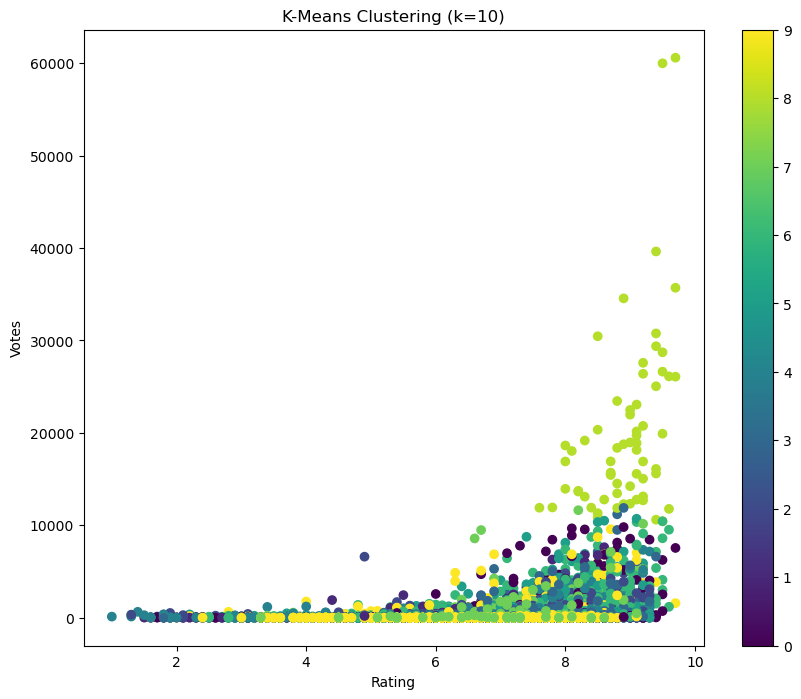

In [18]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Games_df['rating'], Games_df['votes'], c=Games_df['Cluster'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('K-Means Clustering (k=10)')
plt.colorbar(scatter)
plt.show()

We will not garner much of a multi-dimensional cluster with a 2D chart, as expected.  What we do see from this angel (Votes over Rating) is that many of the clusters cluster in the bottom, or in other words, many of the rows do not have that many votes, so the scale is being thrown off a bit by this charts outliers up at 60K.  We also see that many of the titles might not have many, if any, votes.  However, the objective here is to see why/what got clustered by the ML; this chart does not say much.

Below we incorporate the seaborn module to create box plots which again represents the interquartile range (IQR: 25th to 75th percentile), with the line inside the box as the median, and the whiskers represent the range of the data within 1.5*IQR. Data points outside this range are considered outliers and are plotted as individual points.

By comparing these box plots, we might be able to see whether specific clusters tend to have higher or lower ratings or votes than others.

We didn't think these plots provided too much insight; however,  we see that most of the clusters have an average rating between 6 and 8, with cluster 8 being unique. 

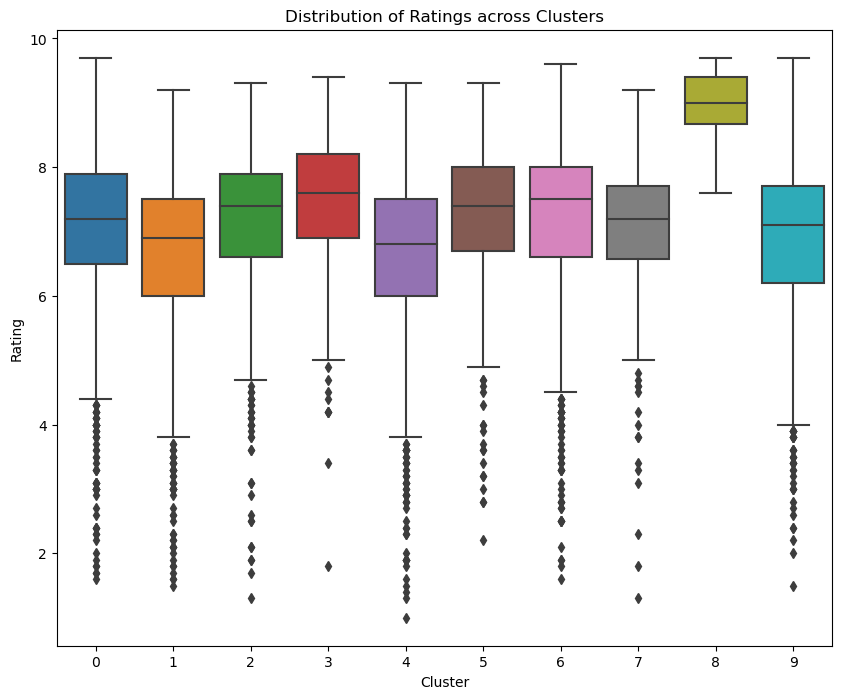

In [19]:
#  box plots to compare the distribution of ratings across the clusters

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='rating', data=Games_df)
plt.title('Distribution of Ratings across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()


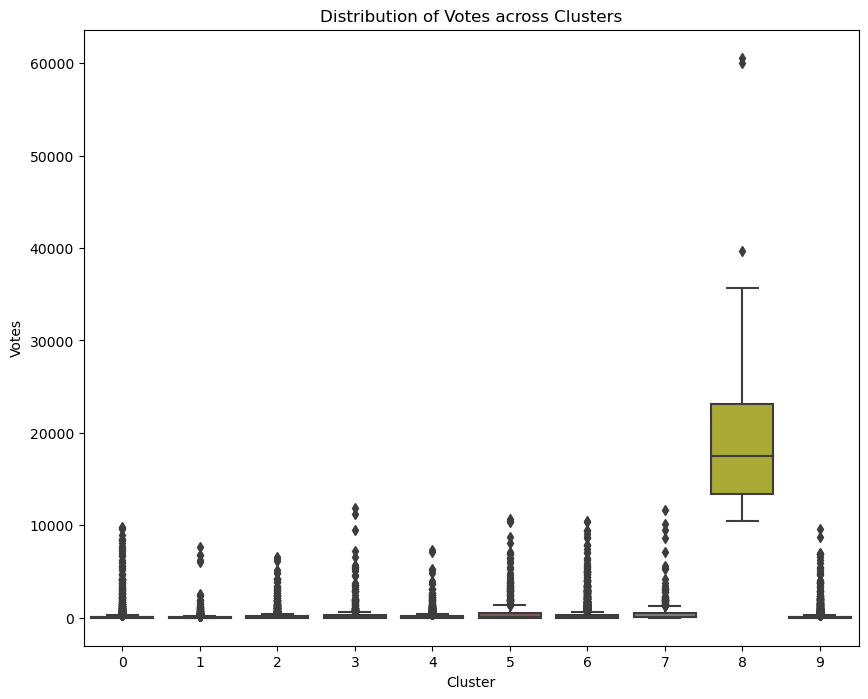

In [20]:
#  box plots to compare the distribution of votes across the clusters

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='votes', data=Games_df)
plt.title('Distribution of Votes across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Votes')
plt.show()


...And for most of the clusters, the votes are a pretty small number, but every cluster had quite a few outliers.  Cluster 8 is off doing its own thing again, but most of the rows in this cluster had higher voting than the other clusters.

We didn't like how the clusters were visualized, so we thought we would create a heat map to see how the genes were preportioned through the clusters.  This provide what we thought was a little more insight. 

In [21]:
# This function calculates the mean of each genre column in a given cluster dataframe
def compute_genre_proportions(cluster_df):
    proportions = cluster_df.iloc[:, 4:-1].mean()
    return proportions

'genre_proportions' is a data frame where each row corresponds to a cluster, and each column corresponds to a genre. The values are the proportions of games in the cluster that belong to the genre.

In [22]:
# apply this function to each cluster and gather the results in a new dataframe

genre_proportions = pd.DataFrame()
for cluster in range(10):
    cluster_df = Games_df[Games_df['Cluster'] == cluster]
    proportions = compute_genre_proportions(cluster_df)
    genre_proportions = genre_proportions.append(proportions, ignore_index=True)


C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\1727131660.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\1727131660.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\1727131660.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_proportions = genre_proportions.append(proportions, ignore_index=True)
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\1727131660.py:7: FutureWarning: The frame.append method is deprecated and will be rem

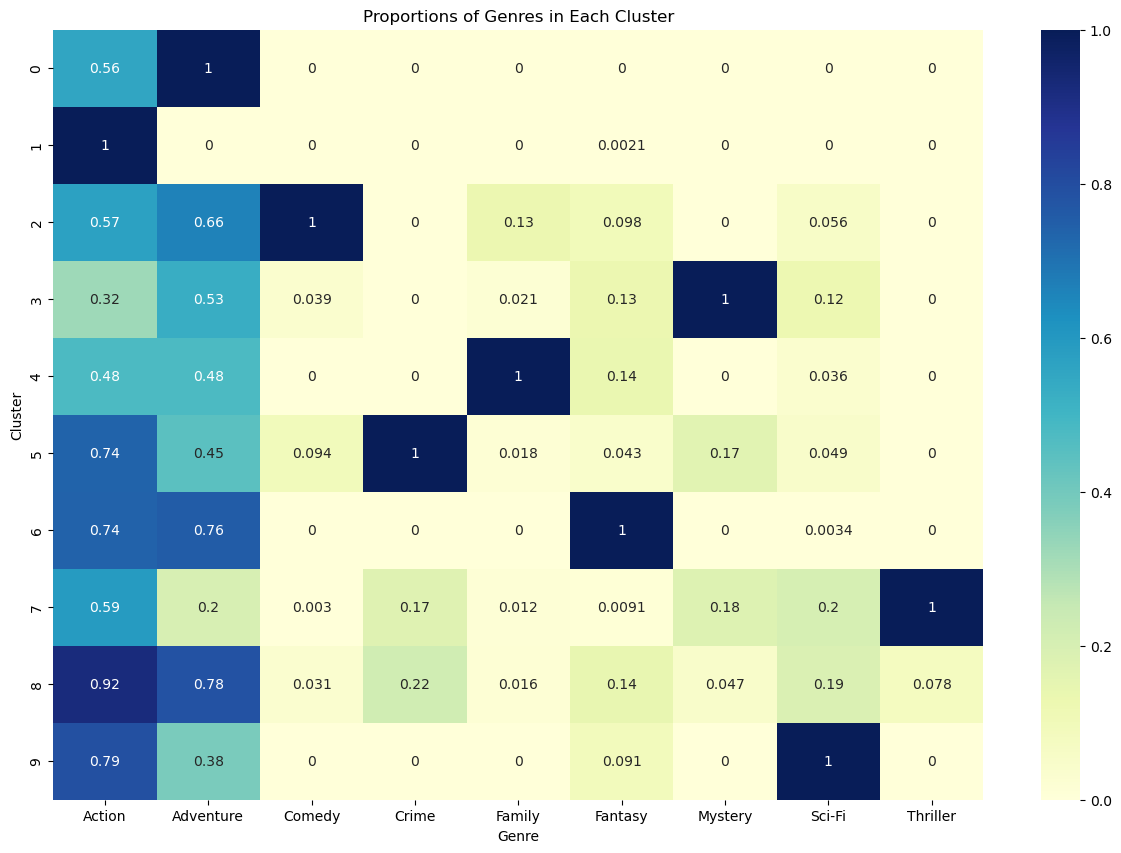

In [23]:
# plot this information in a bar plot
plt.figure(figsize=(15, 10))
ax = sns.heatmap(data=genre_proportions, annot=True, cmap="YlGnBu")
ax.set_yticklabels(range(0, 10))  # This line changes the y-axis labels
plt.title('Proportions of Genres in Each Cluster')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()



The above chart is a good view of how the genres are weighted in each cluster.  One of the biggest takeaways is that each cluster has one genre with most of the weight.  It also shows Action and Adventure are sprinkled in every cluster.  This chart alone tells us the whole dataset is very action and adventure heavy, and some clusters also have a lot of action and adventure within themselves. 

Let's see if we can understand what is going on with the clustering with a PCA.  This should make it so we can "graph" multi-dimensional clustering on a two-dimensional plane (hopefully).  
Using two principal components, we should be able to plot the data points and then color-code them by cluster to visualize clustering results in a two-dimensional plot. 

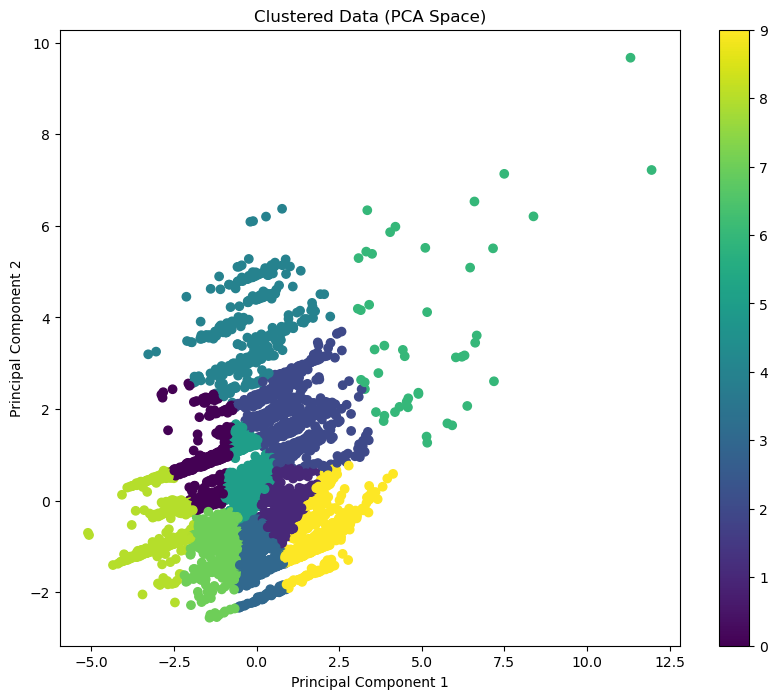

In [24]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Run KMeans clustering on the principal components
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=1)
clusters = kmeans.fit_predict(principalComponents)

# Add the cluster labels to your PCA dataframe
principalDf['cluster'] = clusters

# Plot the data points in the space of first two principal components, color-coded by cluster
plt.figure(figsize=(10,8))
scatter = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA Space)')
plt.colorbar(scatter)
plt.show()


It is a pretty chart, but what is it telling us?  From the chart, we can see the "borders" of the clusters.  Plotting PCA2 over PCA1 and "squishing" the multidimensional space into a 2D space paints a better picture than our first scatter chart.  At least in showing off the clusters.  But is this a good representation of what the clustering did?  Time for a bit of analysis. 
First, let's examine the feature loading or what features had the most weight in each PCA.

In [25]:
# Get the feature loadings
loadings = pca.components_

# Create a dataframe that contains the loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features.columns)

# Print the dataframe
print(loadings_df)


                PC1       PC2
year       0.410954  0.125215
rating     0.492679  0.116633
votes      0.326266  0.229865
Action     0.023242  0.052798
Adventure  0.440211 -0.325593
Comedy     0.089195 -0.123621
Crime      0.097418  0.427815
Family    -0.273180 -0.283611
Fantasy    0.296770 -0.365975
Mystery    0.114154  0.353247
Sci-Fi    -0.306913  0.242892
Thriller  -0.015418  0.461108


Looking at the PC1 column, the features rating, year, Adventure, and votes have the highest absolute values, suggesting that they contribute most to the variance along the first principal component.
On the other hand, looking at the PC2 column, Thriller, Crime, Sci-Fi, and Fantasy have the highest absolute values, suggesting that they contribute most to the variance along the second principal component.

What about the variance?

In [26]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

Explained Variance:  [0.13326569 0.11851359]


Reducing it to two principal components only accounts for about 25% of the variance.  This might not be the best representation of the data.  
Lets take a look to see how may PCAs it would take to explaine best witout using the same number of PCA to original featuers.

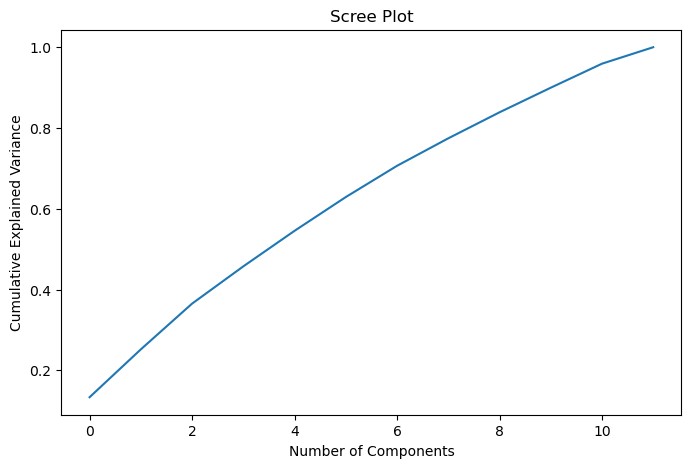

In [27]:
# Let's fit PCA with more components
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [28]:
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(explained_variance > 0.95)[0][0] + 1

print(f"To explain 95% of variance we need {num_components} principal components.")


To explain 95% of variance we need 11 principal components.


It is a curve with no well-defined elbow.  PCA may have helped show where some of the clusters are happening, but in trying to keep it two-dimensional for understanding, it is not the best representation for this dataset using KMeans.

Can we gain anything from the original KMeans model with the 9 clusters? Let's try a little more analysis below.

First, how is the data distrubtion within the clusters.

In [29]:
print(Games_df['Cluster'].value_counts())

6    2086
0    1821
9    1611
1    1441
4    1295
2    1006
3     518
5     510
7     328
8      64
Name: Cluster, dtype: int64


In [30]:
# The cluster_centers_ attribute of the KMeans model gives the coordinates of the cluster centroids in the scaled feature space.
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=features.columns)

print(centroids)

       year    rating      votes    Action  Adventure    Comedy     Crime  \
0  0.198289  0.051927  -0.080583 -0.264161   0.894821 -0.334892 -0.239855   
1 -0.005780 -0.288212  -0.167565  0.684418  -1.114789 -0.334892 -0.239855   
2  0.150767  0.097194  -0.076428 -0.228313   0.221091  2.986040 -0.239855   
3  0.289888  0.357824   0.006096 -0.770907  -0.046738 -0.206670 -0.239855   
4 -0.380143 -0.315307  -0.108438 -0.434847  -0.153155 -0.334892 -0.239855   
5  0.086218  0.174877   0.145187  0.122624  -0.211443 -0.022333  4.169185   
6  0.087492  0.193838  -0.005295  0.131963   0.404202 -0.334892 -0.239855   
7  0.399105  0.045032   0.099010 -0.189928  -0.716105 -0.324767  0.526350   
8  0.491274  1.569152  10.146046  0.518419   0.456945 -0.231113  0.724622   
9 -0.342105 -0.101044  -0.088431  0.234783  -0.343030 -0.334892 -0.239855   

     Family   Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.396354 -0.569277 -0.257476 -0.463252 -0.179397  
1 -0.396354 -0.564435 -0.257476 -0.463252 -0

We have scaled the data before applying KMeans. This scaling procedure typically involves subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features are on a similar scale and that one feature does not dominate the others due to its scale.

As a result, the values in the above output are expressed in terms of standard deviations from the mean of the entire dataset.

Below is an example of all the rows in the smallest cluster. It was saved to a CSV to examine in Excel to better understand the game titles in a given cluster.

In [31]:
# Example: Analyze games in cluster 8
cluster_8_games = Games_df[Games_df['Cluster'] == 8]
print(cluster_8_games)
# cluster_8_games.to_csv('./Data/KMeansClusters/cluster_8_games.csv', index=False)


                             name    year  rating    votes  Action  Adventure  \
0                      Spider-Man  2018.0     9.2  20759.0    True       True   
1          Red Dead Redemption II  2018.0     9.7  35703.0    True       True   
2              Grand Theft Auto V  2013.0     9.5  59986.0    True      False   
3                      God of War  2018.0     9.6  26118.0    True       True   
4      Uncharted 4: A Thief's End  2016.0     9.5  28722.0    True       True   
...                           ...     ...     ...      ...     ...        ...   
6824                     Portal 2  2011.0     9.4  15609.0   False       True   
6843                       Portal  2007.0     9.1  12784.0   False       True   
9176                   Heavy Rain  2010.0     8.8  13457.0   False      False   
10107                  Until Dawn  2015.0     8.8  14522.0   False      False   
10279            The Walking Dead  2012.0     9.2  12703.0   False      False   

       Comedy  Crime  Famil

Another approach taken was to cluster subgroups.  The idea was to group rows by ten-year bins from 1950 to 2030 (we ended up throwing out the tiny dataset with everything after 2020).  Each binned group went through the KMeas ML and then was charted.  The thought was to look at the distribution of the clusters related to the genre over the different subgroups.  Unfourtently this effort was mostly inconclusive, at least to our amateur eyes. 

The first bit of code is to turn the year column into integers which is potentially easier to process through the KMeans ML.

In [32]:
# Convert 'year' from float to int for easier processing
Games_df['year'] = Games_df['year'].astype(int)

# Create time bins for 'year' and add as a new column
Games_df['time_period'] = pd.cut(Games_df['year'], bins=range(1950, 2030, 10), labels=range(1950, 2020, 10))

# Now 'time_period' is a categorical variable representing the decade a game was released

Next, we add the bins called time_period and run each through the KMeans ML.  

We noticed with the first run that these need to be charted.  Looking at the centroid over many years is not a good visualization.  

In [33]:
# Loop over each time period
for time_period in Games_df['time_period'].unique():
    
    # Subset the DataFrame for the current time period
    time_period_df = Games_df[Games_df['time_period'] == time_period]
    
    # If time_period_df is empty or has less than 10 samples, skip to next iteration
    if time_period_df.empty or len(time_period_df) < 10:
        print(f"Not enough data for time period {time_period}. Skipping...")
        continue

    # Standardize the features
    features = time_period_df[['rating', 'votes', 'Action', 'Adventure', 
    'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=10, random_state=1)
    kmeans_model.fit(features_scaled)

    # Add the cluster assignments back to the DataFrame
    time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_

    # Display the centroid coordinates for this time period
    centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=features.columns)
    print(f"Centroids for {time_period}:\n")
    print(centroids)

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\4270061265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids for 2010:

     rating     votes    Action  Adventure    Comedy     Crime    Family  \
0  0.001095 -0.111716 -0.084085   0.252473  2.887525 -0.232073 -0.321888   
1  0.182650 -0.035050  0.204675   0.380280 -0.346317 -0.232073 -0.321888   
2 -0.020913 -0.086352  0.107508  -0.312899 -0.346317 -0.232073 -0.321888   
3  0.297353 -0.041042 -0.948043  -0.292115 -0.225426 -0.232073 -0.257803   
4 -0.393134 -0.173641 -1.097914  -0.482085  0.177601 -0.232073  3.106666   
5 -0.177680 -0.118027  0.121346   0.003489 -0.346317 -0.232073 -0.321888   
6  0.278640  0.153575  0.221701  -0.260884 -0.002722  4.308992 -0.279032   
7 -0.055087  0.039115 -0.437432  -0.884812 -0.325454  0.119494 -0.277649   
8  0.042589 -0.087804  0.765549   0.549243 -0.346317 -0.232073  3.106666   
9  1.561996  8.471384  0.627429   0.582998 -0.238523  0.676140 -0.321888   

    Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.380780 -0.287551 -0.264865 -0.216539  
1  1.731719 -0.287551 -0.408932 -0.216539  
2 -0.34253

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\4270061265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids for 2000:

     rating     votes    Action  Adventure    Comedy     Crime    Family  \
0  0.059020 -0.110088 -0.210104   0.189923  2.921719 -0.275657  0.077777   
1  0.146545 -0.031152  0.096906   0.323884 -0.342264 -0.275657 -0.388523   
2  0.008650 -0.143794 -0.194809   0.841483 -0.342264 -0.275657 -0.388523   
3 -0.081982 -0.097452  0.199201  -0.247961 -0.342264 -0.275657 -0.373524   
4  0.069841  0.137704  0.369307  -0.290555 -0.028420  3.627695 -0.388523   
5 -0.253324 -0.113331 -0.468285  -0.082681 -0.342264 -0.275657  2.573851   
6 -0.297155 -0.191467  0.613745  -1.188378 -0.342264 -0.275657 -0.388523   
7  0.293361 -0.045534 -0.668018  -0.138450 -0.294028  0.397335 -0.315558   
8  0.042072  0.088401  0.148962  -0.749489 -0.342264  0.814468 -0.361835   
9  1.583474  7.832120  0.489130   0.277633 -0.251598  0.700181 -0.306235   

    Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.340575 -0.270486 -0.313372 -0.190027  
1  1.735943 -0.270486 -0.402479 -0.190027  
2 -0.57605

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\4270061265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Centroids for 1990:

     rating      votes    Action  Adventure    Comedy     Crime    Family  \
0  0.015527  -0.052931  0.286848  -0.304517 -0.353954 -0.228489 -0.446456   
1 -0.198288  -0.218339  0.674398  -1.086416 -0.353954 -0.228489 -0.446456   
2  0.025301  -0.014625 -0.358038   0.155191  2.825223 -0.228489 -0.017899   
3  0.092528  -0.109326 -0.160842   0.920458 -0.353954 -0.228489 -0.446456   
4 -0.336877  -0.074121 -0.480825  -0.126845 -0.353954 -0.228489  2.239864   
5  0.206855   0.061716  0.058054   0.439548 -0.353954 -0.228489 -0.446456   
6  0.229920  -0.079961 -0.842957   0.257169 -0.165359  0.513006 -0.355394   
7  0.023269   0.192459  0.256875  -0.201665  0.022077  4.376582 -0.446456   
8  0.168884   0.322569  0.195019  -0.473204 -0.353954  1.178616 -0.371836   
9  1.589036  10.200058  0.494631   0.251500 -0.089023 -0.228489 -0.446456   

    Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.395450 -0.230437  1.859740 -0.123091  
1 -0.562598 -0.230437 -0.537710 -0.123091  

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\4270061265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroids for 1980:

     rating      votes    Action  Adventure    Comedy     Crime    Family  \
0  0.286530  -0.014362 -0.101000   1.173376 -0.213766 -0.180358 -0.538188   
1 -0.286471  -0.176513  0.450444  -0.822885 -0.213766 -0.180358 -0.515035   
2 -0.240007  -0.044762 -0.596890  -0.299800 -0.213766 -0.180358  1.858087   
3  0.187032  -0.089131  0.468932   0.076167  0.193881  5.544541 -0.338498   
4  0.401410  -0.085814 -0.582446   0.290415  4.678004 -0.180358  0.014799   
5  0.194318  -0.007214 -0.074122   0.623711 -0.213766 -0.180358 -0.477980   
6  0.750223   0.259317 -0.892500   0.458452  0.073985  1.840195 -0.256273   
7  0.307633  -0.072323 -0.144054   0.068494 -0.213766  0.340088 -0.538188   
8  1.945566  10.500317  0.286693   1.173376  0.601529 -0.180358  0.659950   
9 -0.196734  -0.095534  0.651171  -0.852242 -0.213766 -0.180358 -0.538188   

    Fantasy   Mystery    Sci-Fi  Thriller  
0 -0.546034 -0.136505  0.040055 -0.106326  
1 -0.454153 -0.136505  1.573859 -0.106326  

C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\4270061265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_


Since this is a for loop to run each subgroup through the model, we get to repeat most of the code.  This time we added some graphs.  Our issue this time is the number of charts created.  Not the best to compare with, so we refined the output a little. 

You can run the below cells but be warned it will produce dozens of charts  :)

In [ ]:
# Loop over each time period
for time_period in Games_df['time_period'].unique():
    
    # Subset the DataFrame for the current time period
    time_period_df = Games_df[Games_df['time_period'] == time_period]
    
    # If time_period_df is empty or has less than 10 samples, skip to next iteration
    if time_period_df.empty or len(time_period_df) < 10:
        print(f"Not enough data for time period {time_period}. Skipping...")
        continue

    # Standardize the features
    features = time_period_df[['rating', 'votes', 'Action', 'Adventure', 
    'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=10, random_state=1)
    kmeans_model.fit(features_scaled)

    # Add the cluster assignments back to the DataFrame
    time_period_df['Cluster'] = kmeans_model.labels_

    # Display the centroid coordinates for this time period
    centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns=features.columns)
    print(f"Centroids for {time_period}:\n")
    print(centroids)
    
    # Group by the cluster to get the mean of each genre, which is equivalent to the proportion in binary variables
    cluster_means = time_period_df.groupby('Cluster')[['Action', 'Adventure', 'Comedy', 'Crime', 
    'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']].mean()

    # For each cluster, create a bar plot of the proportions
    for cluster in cluster_means.index:
        plt.figure(figsize=(10,6))
        cluster_means.loc[cluster].plot(kind='bar')
        plt.title(f"Proportions of each genre for cluster {cluster} in time period {time_period}")
        plt.ylabel("Proportion")
        plt.show()


On our third attempt at creating something we could look at, we decided to make a multi-bar graph for every ten years subgroup.  This was also about the time we realized that each subgroup was its own dataset and a smaller dataset at that.  Even though the number of features stayed the same, maybe 10 clusters was asking for too much for visualization.  We did some research, and instead of running the elbow method for each subgroup, we decided to reduce the number of clusters to 5 from 10 and run all the subgroups through that model.  This causes a few issues, and the biggest is that we could be under-fitting and overfitting because of the different distribution rows within each subgroup.  That said, we did get the output and will show the results.  

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\3247922289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


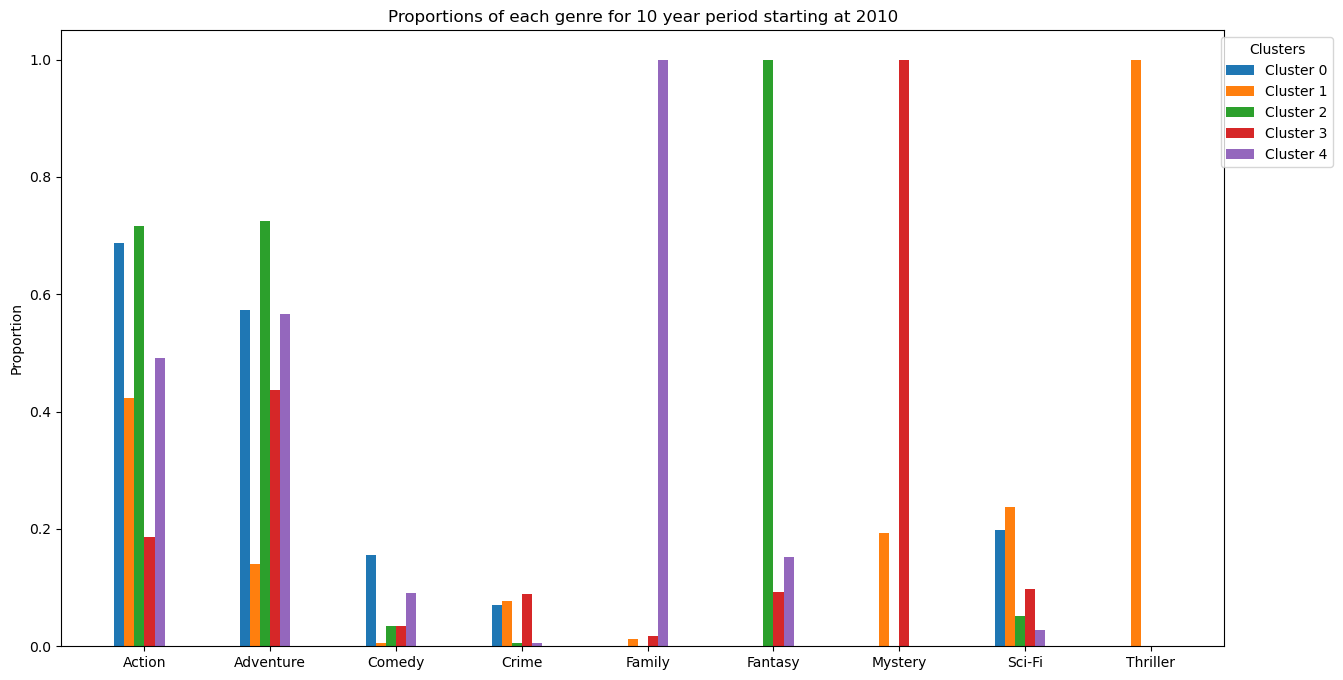

Not enough data for time period nan. Skipping...


d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\3247922289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


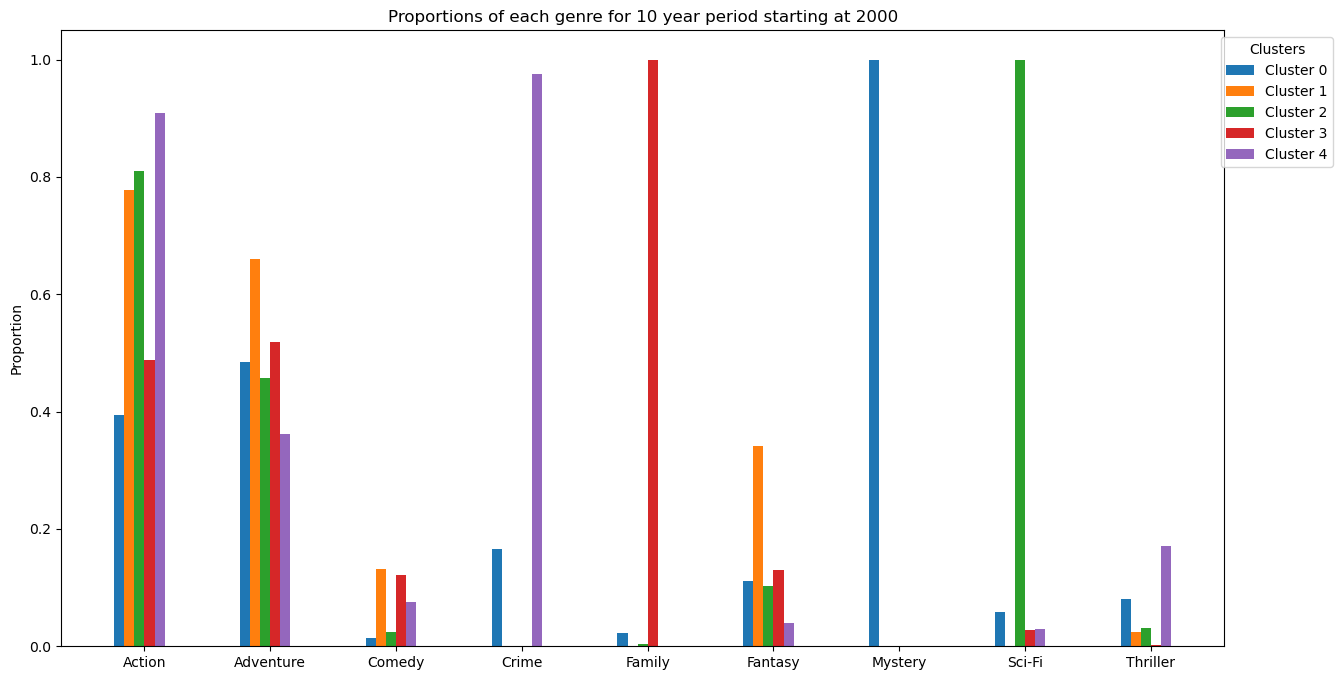

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\3247922289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


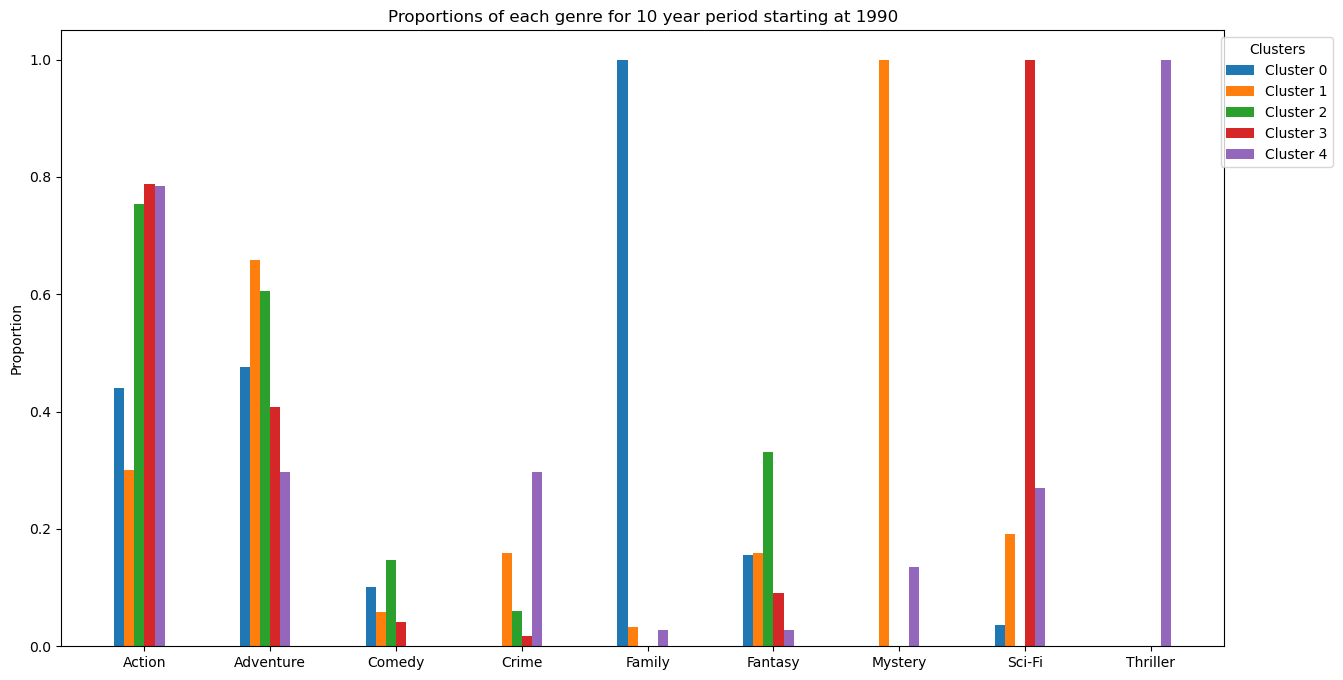

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\3247922289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


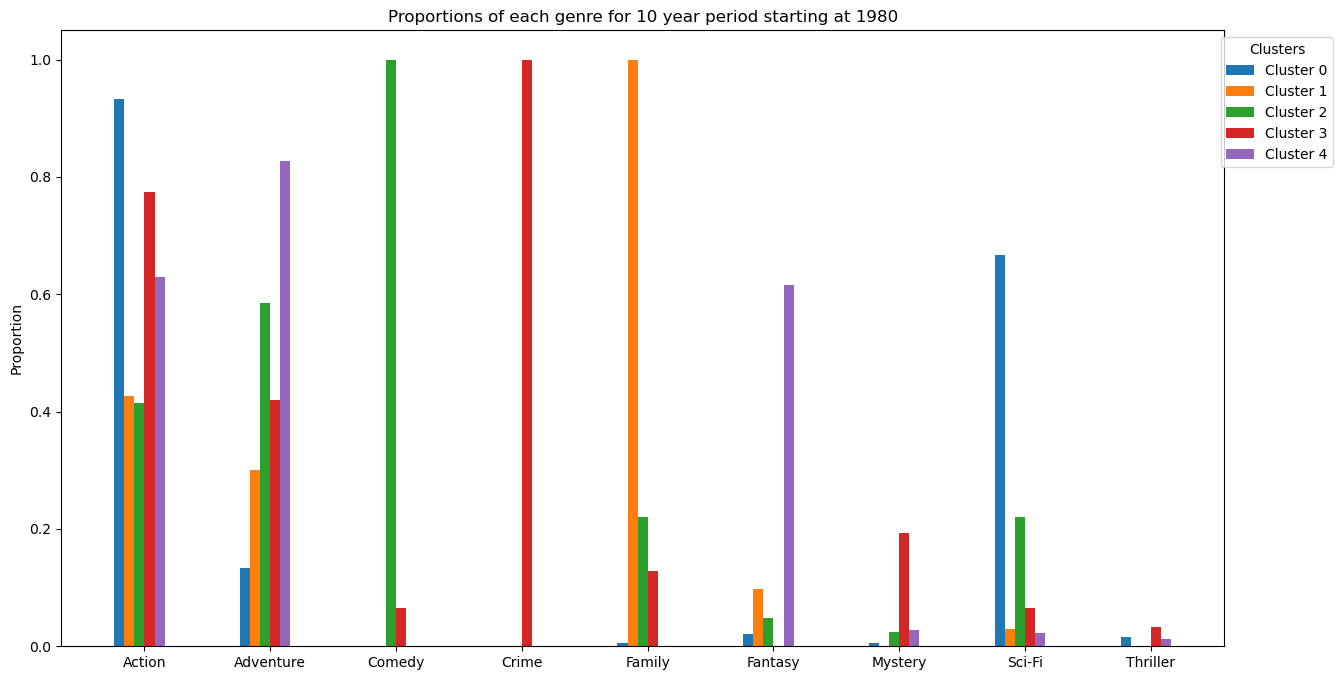

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\3247922289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df['Cluster'] = kmeans_model.labels_


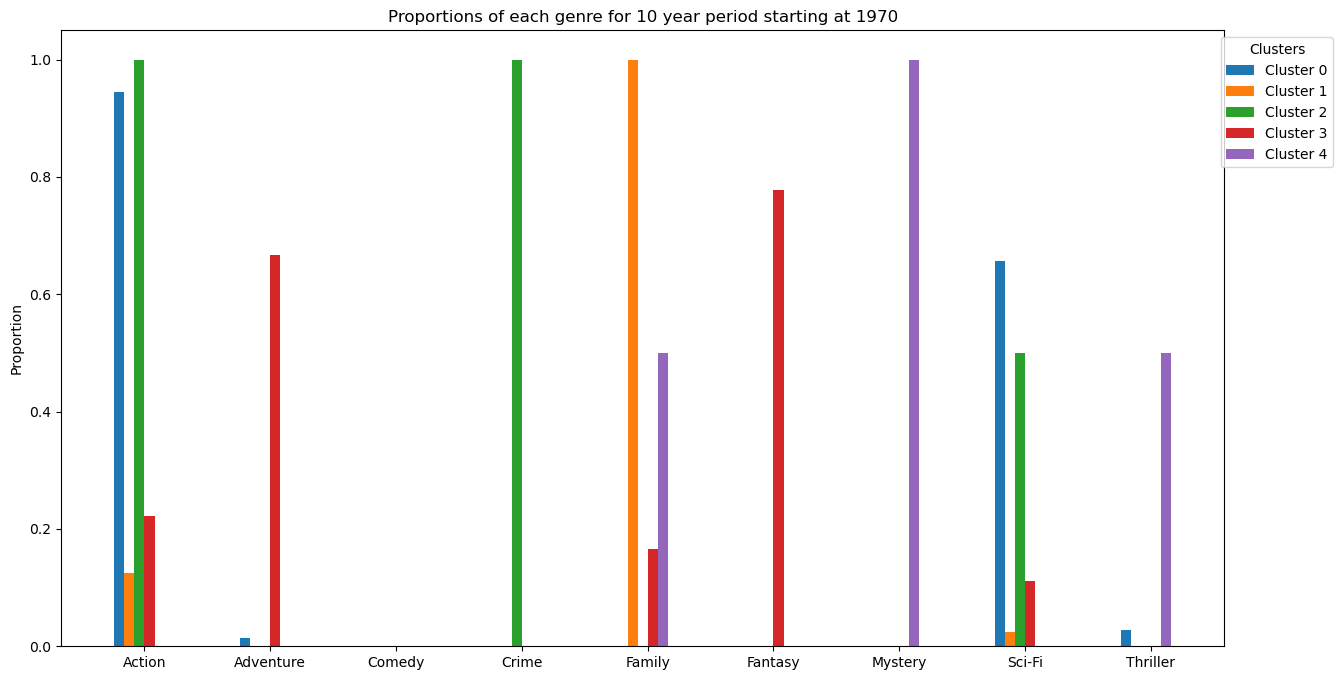

Not enough data for time period 1950. Skipping...
Not enough data for time period 1960. Skipping...


In [35]:
# Loop over each time period
for time_period in Games_df['time_period'].unique():
    
    # Subset the DataFrame for the current time period
    time_period_df = Games_df[Games_df['time_period'] == time_period]
    
    # If time_period_df is empty or has less than 9 samples, skip to next iteration
    if time_period_df.empty or len(time_period_df) < 10:
        print(f"Not enough data for time period {time_period}. Skipping...")
        continue

    # Standardize the features
    features = time_period_df[['rating', 'votes', 'Action', 'Adventure', 
    'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=5, random_state=1)
    kmeans_model.fit(features_scaled)

    # Add the cluster assignments back to the DataFrame
    time_period_df['Cluster'] = kmeans_model.labels_

    # Group by the cluster to get the mean of each genre, which is equivalent to the proportion in binary variables
    cluster_means = time_period_df.groupby('Cluster')[['Action', 'Adventure', 'Comedy', 'Crime', 
    'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']].mean()

    # Number of genres
    num_genres = cluster_means.shape[1]

    # Create an array with the position of each bar along the x-axis
    x = np.arange(num_genres)

    # Start a new figure for each time period
    plt.figure(figsize=(15, 8))  # Increase figure size

    # For each cluster, create a bar in the plot
    for cluster in cluster_means.index:
        plt.bar(x - 0.2 + 0.4/(cluster_means.index.max() + 1) * cluster, cluster_means.loc[cluster], 
                width = 0.4/(cluster_means.index.max() + 1), label=f"Cluster {cluster}")

    # Set the name of each genre as labels on the x-axis
    plt.xticks(x, cluster_means.columns.tolist())

    plt.title(f"Proportions of each genre for 10 year period starting at {time_period}")
    plt.ylabel("Proportion")
    plt.legend(loc="upper right", title="Clusters", bbox_to_anchor=(1.1, 1))
    plt.show()


The last bit of code is running the subgroups through the model (back to 10 clusters for science) and creating pie charts.  This time we only took two year groups (2010 and 1980).  We did additional coding to clean up the charts and created some output.  The above bar charts didn't entirely paint the picture we were looking for, so having all the genres within a cluster add up to 100% might be what we need to see to compare genre population change over the years.  But again, we ran the data through a clustering algorithm with a user-defined 10 clusters, and we have no idea if that was the best use of Kmean on this particular dataset.

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\808404328.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_


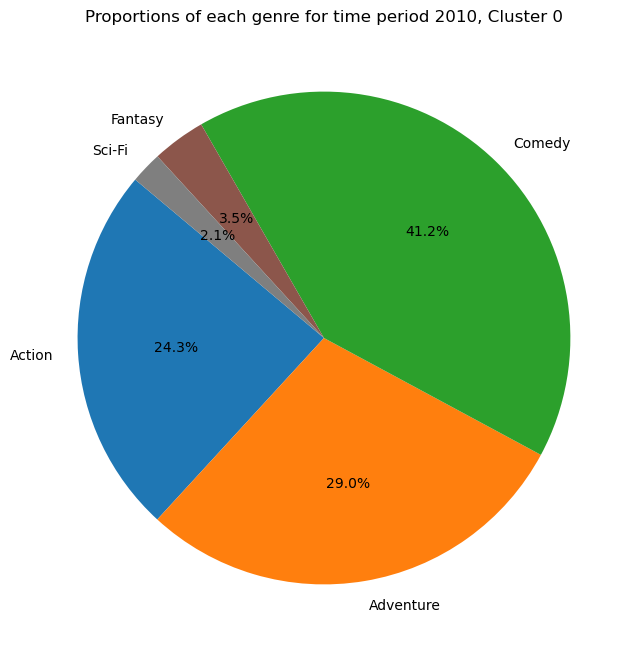

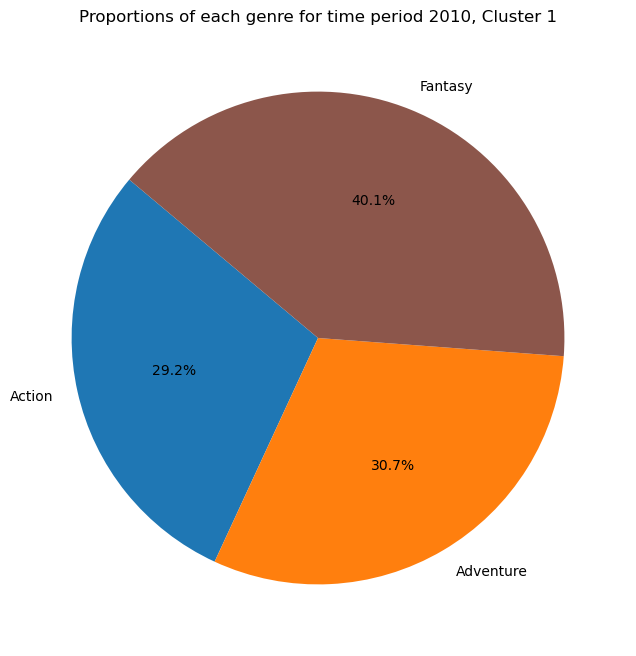

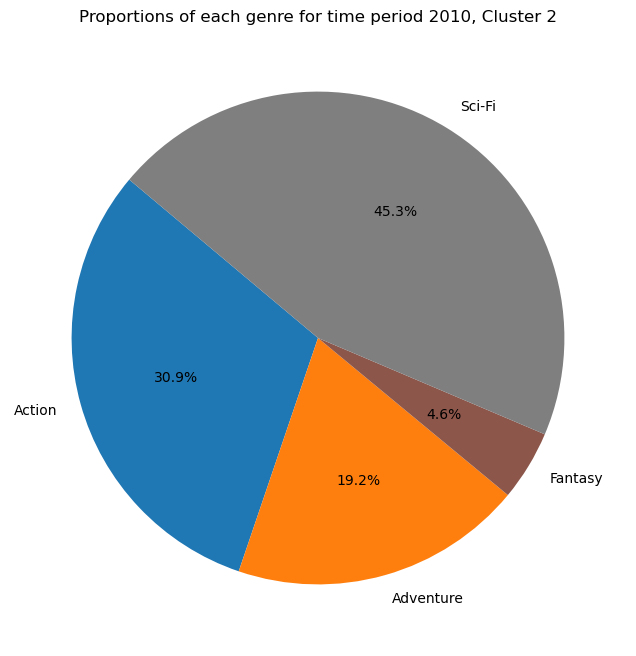

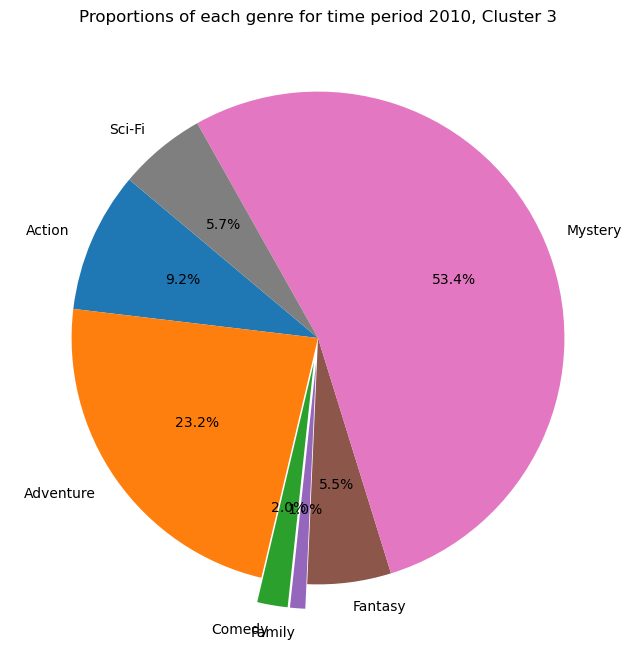

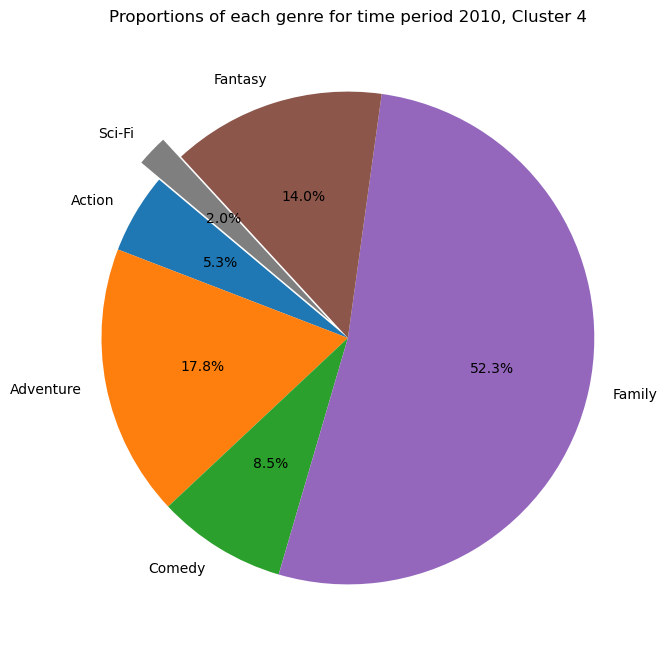

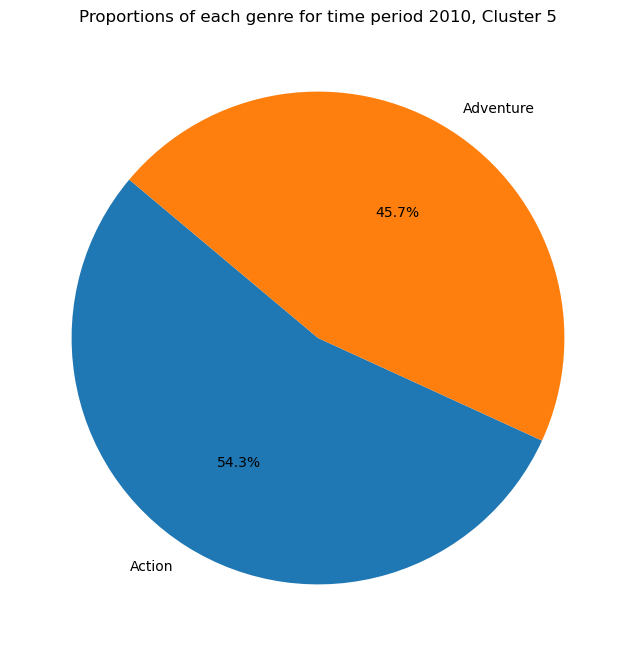

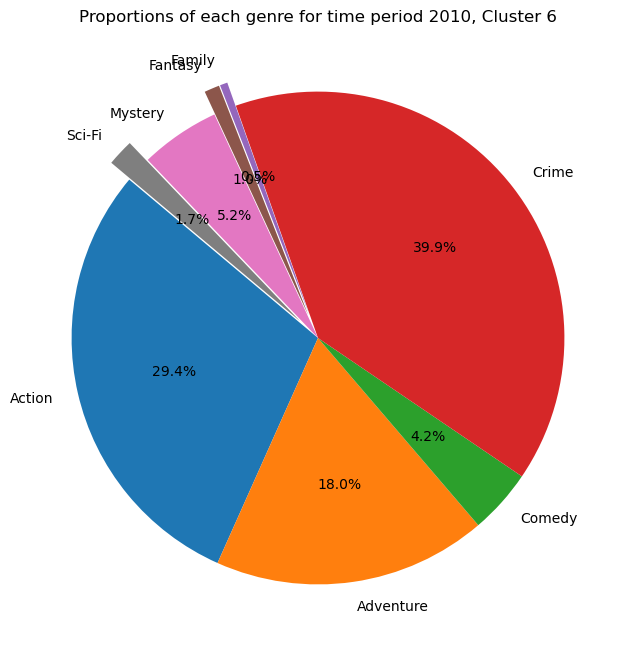

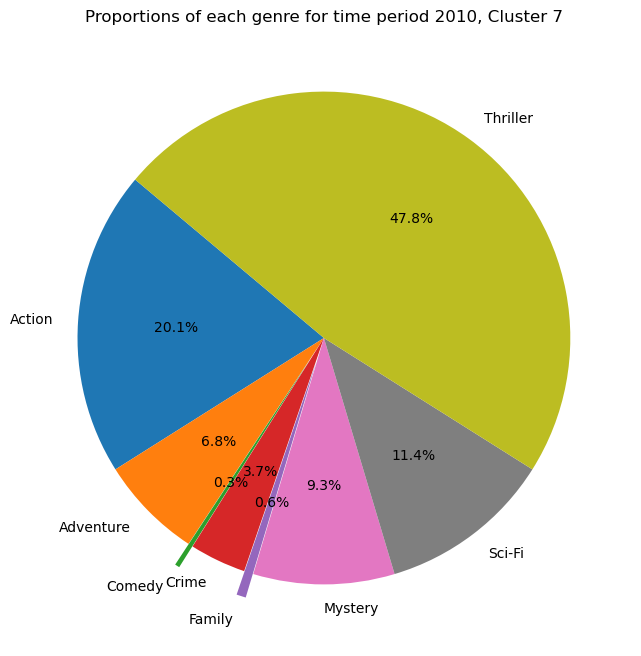

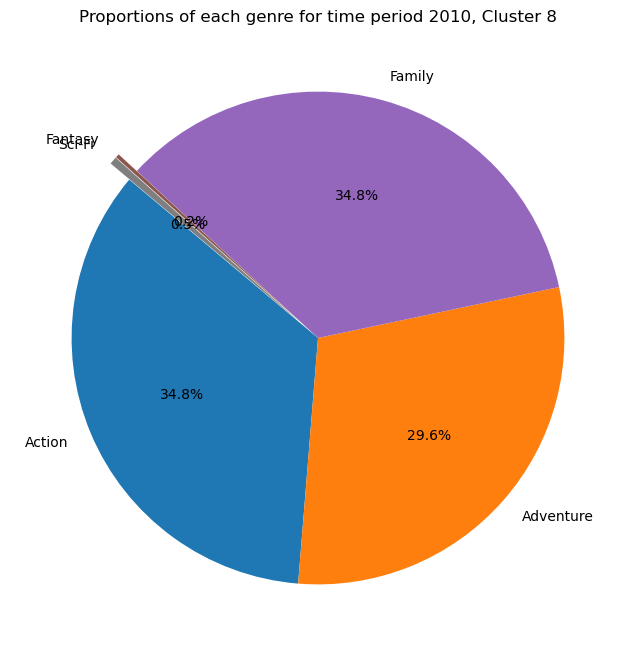

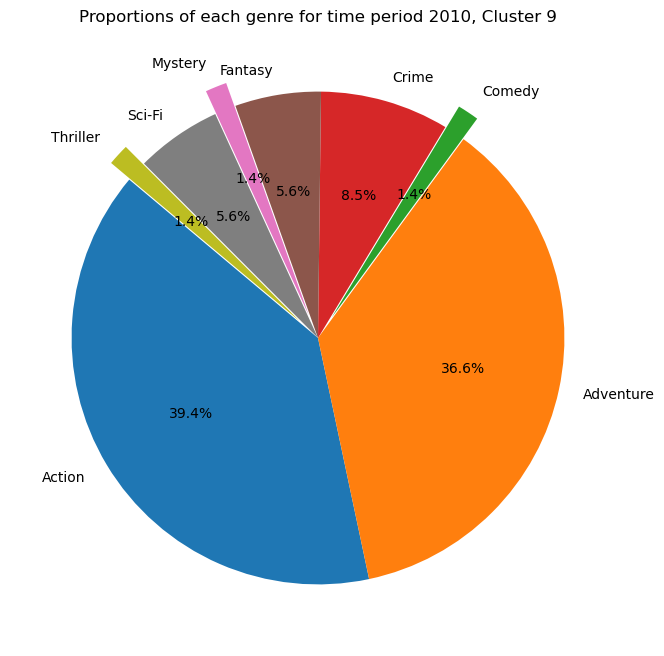

d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\SeanPapworth\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Sean Papworth\AppData\Local\Temp\ipykernel_6848\808404328.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_


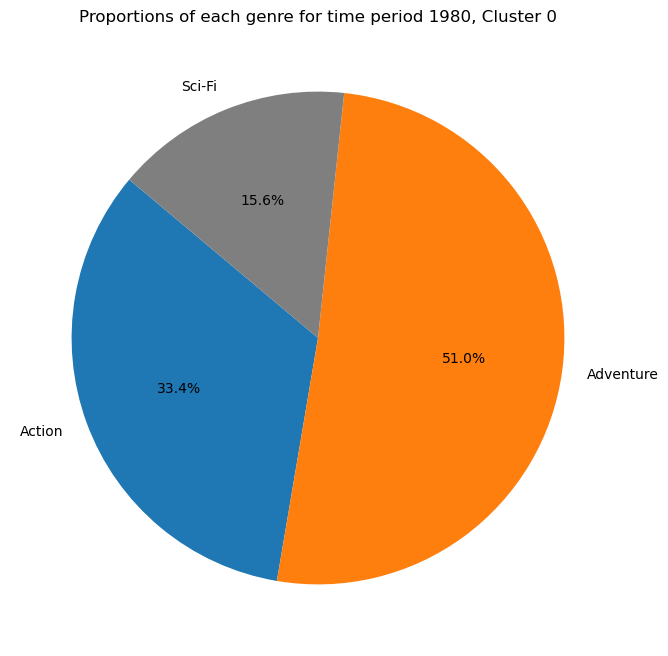

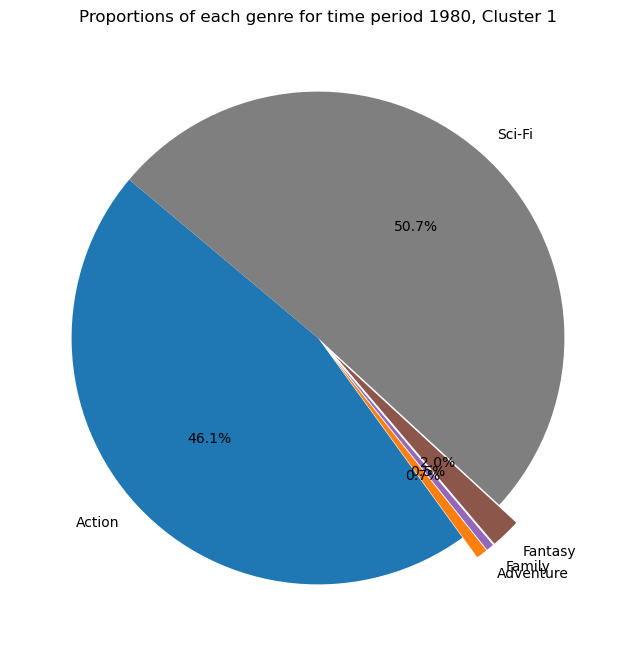

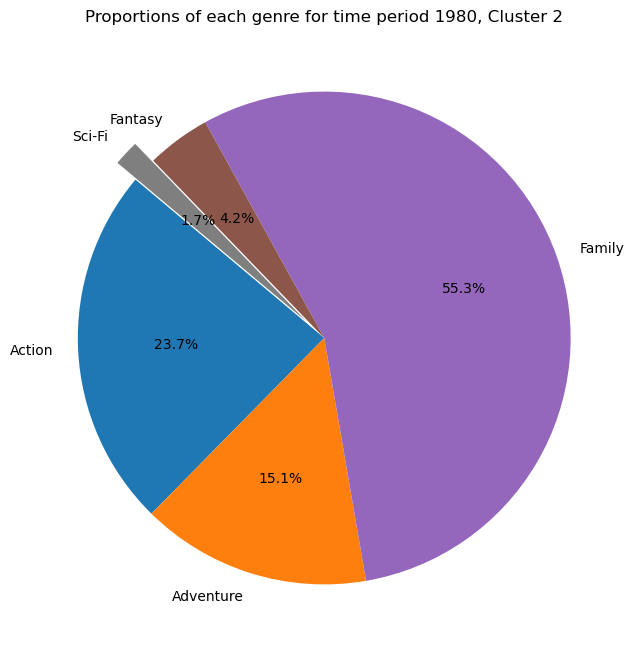

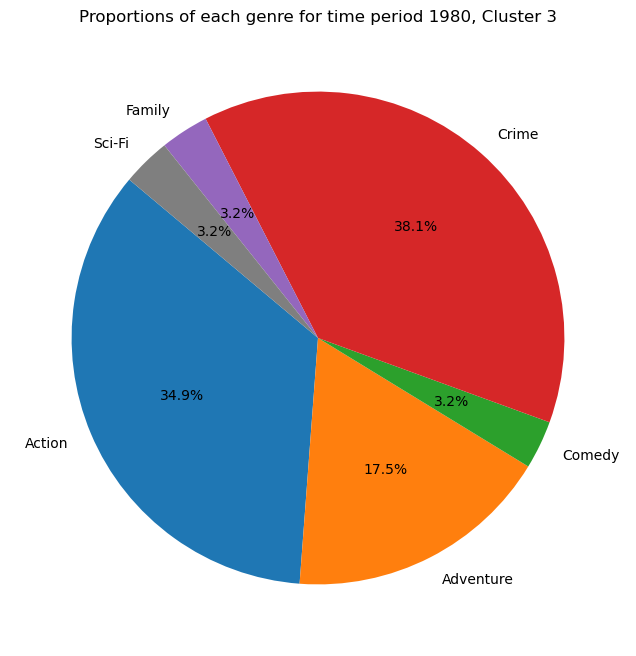

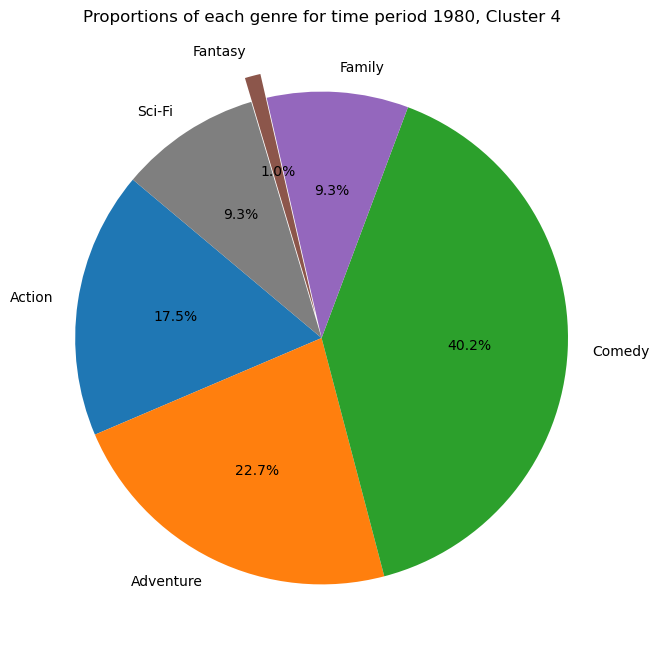

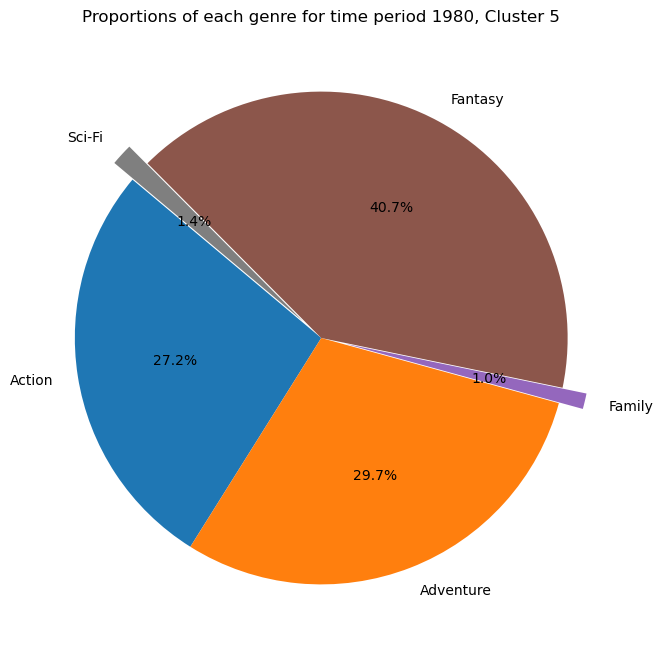

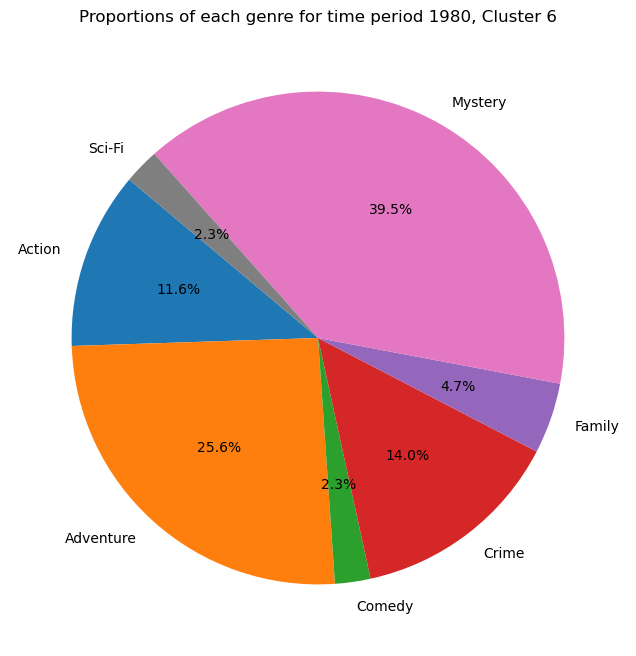

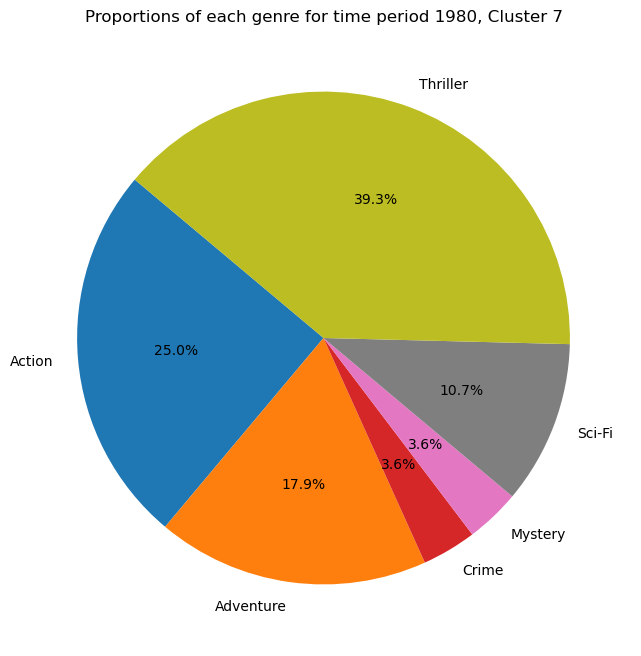

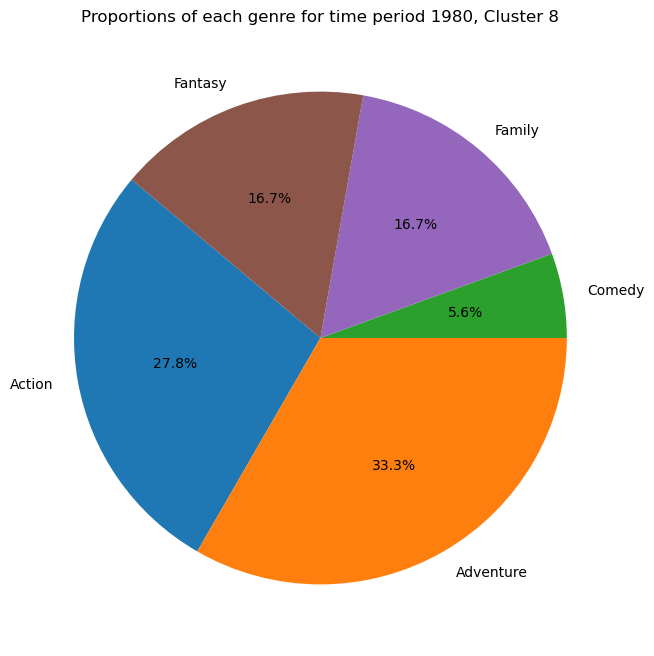

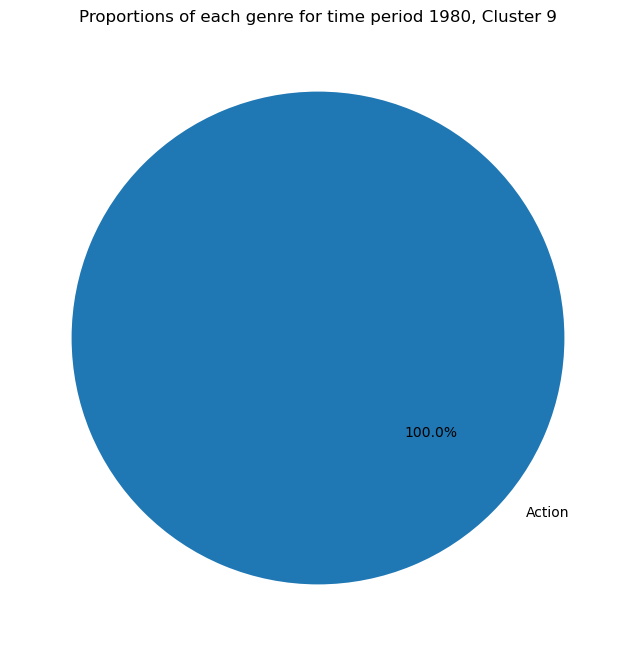

In [36]:
# List of time periods to analyze
time_periods = [2010, 1980]

for time_period in time_periods:
    # Subset the DataFrame for the current time period
    time_period_df = Games_df[Games_df['time_period'] == time_period]
    
    # Standardize the features
    features = time_period_df[['rating', 'votes', 'Action', 'Adventure', 
    'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Initialize and fit the KMeans model
    kmeans_model = KMeans(n_clusters=10, random_state=1)
    kmeans_model.fit(features_scaled)

    # Add the cluster assignments back to the DataFrame
    time_period_df.loc[:, 'Cluster'] = kmeans_model.labels_

    # Group by the cluster to get the mean of each genre, which is equivalent to the proportion in binary variables
    cluster_means = time_period_df.groupby('Cluster')[['Action', 'Adventure', 'Comedy', 'Crime', 
    'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']].mean()

    # Function to format the percentage labels
    def format_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0 else ''

    # Plot a pie chart for each cluster
    for cluster in cluster_means.index:
        fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed
        proportions = cluster_means.loc[cluster]
        
        # Generate an "explode" list which offsets smaller slices
        explode = [0.1 if proportion < 0.05 else 0 for proportion in proportions]

        # Generate labels, if proportion is 0 set label to ""
        labels = [label if prop > 0 else "" for label, prop in zip(cluster_means.columns, proportions)]
        
        ax.pie(proportions, labels=labels, autopct=format_autopct, startangle=140, explode=explode)
        ax.set_title(f"Proportions of each genre for time period {time_period}, Cluster {cluster}")
        plt.show()


The biggest takeaway for us from this portion of the project is.  You need to know what you are trying to accomplish by using ML, be it unsupervised or supervised.  With unsupervised, you need a bit of understanding of your dataset.  Our dataset was mainly binary, with multiple columns representing genres.  Was Kmeans the best ML model to run this set, though?  We don't know, but to get a little more insight into that questions, we picked another popular model and ran our data through it.  To see that outcome, please open the Cluster_DBSCAN.ipynb. 